In [7]:
from dataset import DatasetWrapper
import os, os.path as path
import pandas as pd
from collections import defaultdict
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [6]:
for i in range(1,2):
    for phase in ['train']:#, 'test']:
        csv_filename = os.path.join('/data3/ludi/plankton_wi17/pose/poseprediction_torch/data/', 'pose_class/data_%s_%d.csv' % (phase, i))
        df = pd.read_csv(csv_filename)
    x_axis = np.array([1,0])
    df['pose_x'] = df['head_x'] - df['tail_x']
    df['pose_y'] = df['head_y'] - df['tail_y']
    pose = np.array([df['pose_x'].values,df['pose_y'].values])
    dot = np.dot(x_axis,pose)
    norm = np.linalg.norm(pose,axis=0)
    valid_inds = np.where(norm != 0)[0]
    images = df['images']
    images = images[valid_inds]
    angle = np.arccos(np.divide(dot[valid_inds],norm[valid_inds]))
    below_inds = np.where(pose[1,valid_inds] < 0)[0]
    
    angle[below_inds] = 2*np.pi - angle[below_inds]
    desired_ang = 2*np.pi*np.random.random(angle.shape)
    rotation_ang = desired_ang - angle
    
    


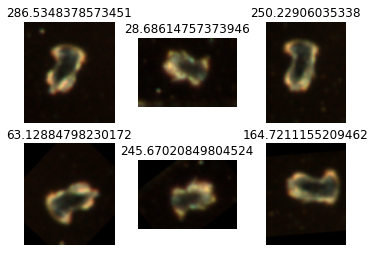

In [38]:
%matplotlib inline
image_dir = '/data5/Plankton_wi18/rawcolor_db/images'
plt.figure()
k = 3
for i,image in enumerate(images):
    plt.subplot(2,k,i+1)
    img = plt.imread(path.join(image_dir,image))
    plt.imshow(img)
    plt.axis('off')
    plt.title(np.rad2deg(angle[i]))
    #plt.show()
    (rows,cols,_) = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),np.rad2deg(rotation_ang[i]),1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    plt.subplot(2,k,i+1+k)
    plt.imshow(dst)
    plt.axis('off')
    plt.title(np.rad2deg(desired_ang[i]))
    #plt.show()
    if i == k-1:
        break
plt.show()